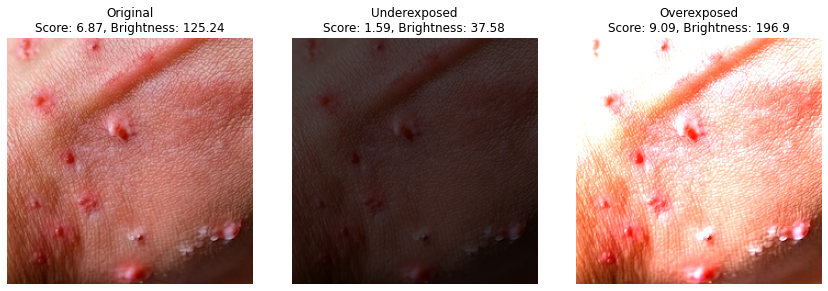

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def estimate_exposure_score(image, ideal=127, tolerance=40):
    """
    Estimates exposure score based on brightness.
    Score:
      1–3   → Underexposed
      4–7   → Well-exposed
      8–10  → Overexposed
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) == 3 else image
    mean_brightness = np.mean(gray)

    deviation = mean_brightness - ideal

    if deviation < -tolerance:
        # Underexposed: map from 1 to 3
        score = 3 - 2 * min(abs(deviation) / (ideal), 1)
    elif deviation > tolerance:
        # Overexposed: map from 10 to 8
        score = 8 + 2 * min(abs(deviation) / (255 - ideal), 1)
    else:
        # Well-exposed: map from 4 to 7 proportionally
        score = 7 - 3 * abs(deviation) / tolerance

    return round(np.clip(score, 1, 10), 2), round(mean_brightness, 2)

def adjust_exposure(image, factor):
    return cv2.convertScaleAbs(image, alpha=factor, beta=0)

# Load and resize image
image = cv2.imread('MP_4.png')  # Replace with your path
image = cv2.resize(image, (224, 224))

# Generate exposure variants
underexposed = adjust_exposure(image, 0.3)
overexposed = adjust_exposure(image, 1.8)

# Get scores
orig_score, orig_brightness = estimate_exposure_score(image)
under_score, under_brightness = estimate_exposure_score(underexposed)
over_score, over_brightness = estimate_exposure_score(overexposed)

# Display
titles = [
    f'Original\nScore: {orig_score}, Brightness: {orig_brightness}',
    f'Underexposed\nScore: {under_score}, Brightness: {under_brightness}',
    f'Overexposed\nScore: {over_score}, Brightness: {over_brightness}'
]
images = [image, underexposed, overexposed]

plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
